### Data Frame Kasus Covid-19 ASEAN


In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index().dropna()

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)

df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())
df_covid_denormalized_asean.head()

Cek nilai unik di kolom 'country_name': ['Malaysia' 'Vietnam' 'Thailand' 'Singapore' 'Indonesia']


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,MY,Malaysia
2019-12-31,0,0,0,0,VN,Vietnam
2019-12-31,0,0,0,0,TH,Thailand
2019-12-31,0,0,0,0,SG,Singapore
2019-12-31,0,0,0,0,ID,Indonesia


### Kasus COVID-19 Pertama di ASEAN

In [5]:
print("The first case popped up in each of 5 ASEAN countries:")
for country_id in asean_country_id:
    asean_country = df_covid_denormalized_asean[df_covid_denormalized_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))

The first case popped up in each of 5 ASEAN countries:
            confirmed_cases geo_id country_name
date                                           
2020-03-02                2     ID    Indonesia
            confirmed_cases geo_id country_name
date                                           
2020-01-25                3     MY     Malaysia
            confirmed_cases geo_id country_name
date                                           
2020-01-24                3     SG    Singapore
            confirmed_cases geo_id country_name
date                                           
2020-01-13                1     TH     Thailand
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam


### Kasus COVID di ASEAN Mulai Bulan Maret

In [7]:
df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index >= "2020-03-01"]
df_covid_denormalized_asean_march_onward.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2020-03-01,0,1,42,1,TH,Thailand
2020-03-01,4,0,102,0,SG,Singapore
2020-03-01,0,0,16,0,VN,Vietnam
2020-03-01,0,0,0,0,ID,Indonesia
2020-03-01,0,0,25,0,MY,Malaysia


### VISUALISASI DATA

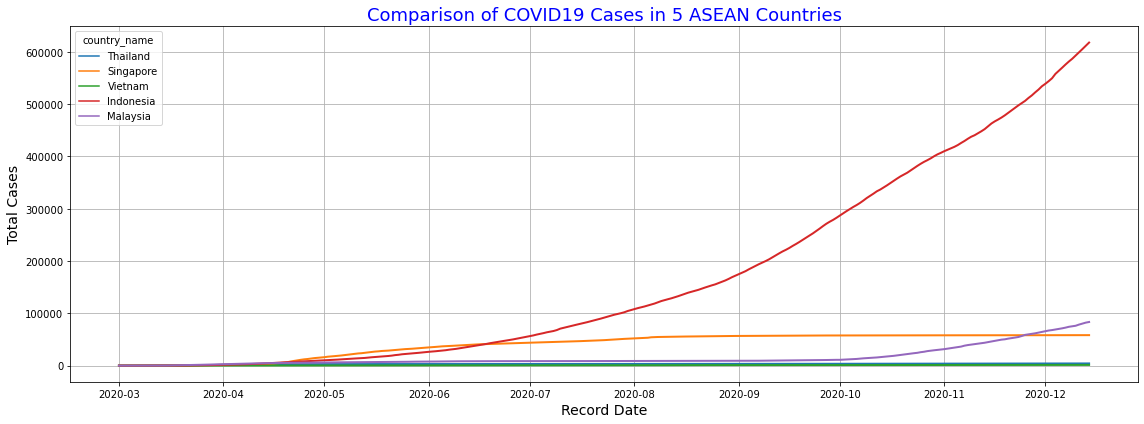

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
sns.lineplot(data= df_covid_denormalized_asean_march_onward, 
             x=df_covid_denormalized_asean_march_onward.index, 
             y="confirmed_cases", 
             hue="country_name",
             linewidth=2)
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 5 ASEAN Countries', color="b", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()